### COMPUTER VISION 
Computer vision is a field of artificial intelligence that enables computers and systems to derive meaningful information from digital images, videos, and other visual inputs. It involves the development of algorithms and models that allow machines to interpret and understand visual data in a way that mimics human vision.

Basic operations in computer vision include:
- Image Classification: Assigning labels to images based on their content.
- Object Detection: Identifying and locating objects within an image.
- Image Segmentation: Dividing an image into segments to simplify analysis.
- Facial Recognition: Identifying or verifying individuals based on facial features.
- Object Tracking: Monitoring the movement of objects across a series of frames in a video.
- Semantic Segmentation: Classifying each pixel in an image into a category.

Computer vision has applications in various fields, including:
- Autonomous Vehicles: Enabling self-driving cars to perceive their surroundings.
- Healthcare: Assisting in medical imaging analysis for diagnostics.
- Retail: Enhancing customer experiences through visual search and inventory management.
- Security: Implementing surveillance systems for threat detection.
- Agriculture: Monitoring crop health and yield through aerial imagery.
- Manufacturing: Quality control and defect detection in production lines.

Computer vision techniques often leverage machine learning and deep learning models, particularly convolutional neural networks (CNNs), to achieve high accuracy in visual recognition tasks.

In [3]:
%pip install opencv-python
import cv2
import numpy as np
print(f"OpenCV version: {cv2.__version__}")


Note: you may need to restart the kernel to use updated packages.
OpenCV version: 4.12.0


In [4]:
image = cv2.imread("image.jpeg")

In [5]:
cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
###video

# import the opencv library
import cv2
  
  
# define a video capture object
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
  
    # Display the resulting frame
    cv2.imshow('frame', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()


In [7]:
### filter operations

image = cv2.imread("image.jpeg")

# Print error message if image is null
if image is None:
    print('Could not read image')

# Apply identity kernel
kernel1 = np.array([[-7, 0, 7],
                    [-7, 0, 7],
                    [-7, 0, 7]])

identity = cv2.filter2D(src=image,  ddepth=-1,kernel=kernel1)


cv2.imshow('Original', image)
cv2.imshow('Identity', identity)
    
cv2.waitKey()
cv2.imwrite('identity.jpg', identity)
cv2.destroyAllWindows()



In [8]:

#blurr filter

# Apply blurring kernel
kernel2 = np.ones((5, 5), np.float32) / 25
img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel2)

cv2.imshow('Original', image)
cv2.imshow('Kernel Blur', img)
    
cv2.waitKey()
cv2.imwrite('blur_kernel.jpg', img)
cv2.destroyAllWindows()


In [9]:
b,g,r=cv2.split(image)

In [10]:
g=b//2
img=cv2.merge((b,g,r))
cv2.imshow('Original', img)
cv2.waitKey()
cv2.destroyAllWindows()


### Convolutional Neural Network 
A Convolutional Neural Network (CNN) is a specialized type of artificial neural network designed for processing structured grid data, such as images. CNNs are particularly effective for tasks involving image recognition, classification, and computer vision due to their ability to automatically and adaptively learn spatial hierarchies of features from input images.

### Detecting Landcover using Satellite Images 
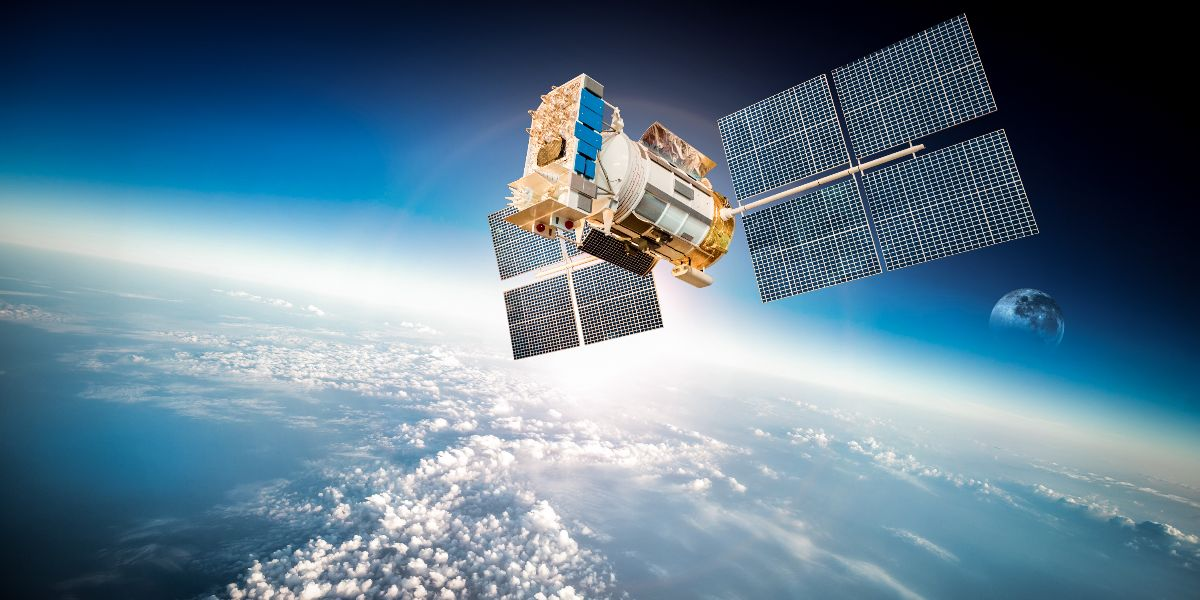


In [5]:



import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools
import requests
import tempfile
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [8]:
# Create an empty dataframe
data = pd.DataFrame(columns=['image_path', 'label'])

# Define the labels/classes

labels = {
    r"C:\Users\Asys\OneDrive\Desktop\edunet\Week 3\Satellite Image data\cloudy": "Cloudy",
    r"C:\Users\Asys\OneDrive\Desktop\edunet\Week 3\Satellite Image data\desert": "Desert",
    r"C:\Users\Asys\OneDrive\Desktop\edunet\Week 3\Satellite Image data\green_area": "Green_Area",
    r"C:\Users\Asys\OneDrive\Desktop\edunet\Week 3\Satellite Image data\water": "Water",
}

# Validate folder paths
for folder in labels:
    if not os.path.exists(folder):
        print(f"Warning: The folder {folder} does not exist.")
        continue

    # Process each image in the folder
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        if os.path.isfile(image_path):  # Only process files
            label = labels[folder]
            data = pd.concat([data, pd.DataFrame({'image_path': [image_path], 'label': [label]})], ignore_index=True)

# Display the resulting DataFrame
print(data)


                                             image_path   label
0     C:\Users\Asys\OneDrive\Desktop\edunet\Week 3\S...  Cloudy
1     C:\Users\Asys\OneDrive\Desktop\edunet\Week 3\S...  Cloudy
2     C:\Users\Asys\OneDrive\Desktop\edunet\Week 3\S...  Cloudy
3     C:\Users\Asys\OneDrive\Desktop\edunet\Week 3\S...  Cloudy
4     C:\Users\Asys\OneDrive\Desktop\edunet\Week 3\S...  Cloudy
...                                                 ...     ...
2012  C:\Users\Asys\OneDrive\Desktop\edunet\Week 3\S...   Water
2013  C:\Users\Asys\OneDrive\Desktop\edunet\Week 3\S...   Water
2014  C:\Users\Asys\OneDrive\Desktop\edunet\Week 3\S...   Water
2015  C:\Users\Asys\OneDrive\Desktop\edunet\Week 3\S...   Water
2016  C:\Users\Asys\OneDrive\Desktop\edunet\Week 3\S...   Water

[2017 rows x 2 columns]


In [10]:
data.to_csv('image_dataset.csv', index=False)
df = pd.read_csv("image_dataset.csv")

In [11]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(255, 255),
                                                    batch_size=32,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(255, 255),
                                                  batch_size=32,
                                                  class_mode="categorical")


Found 1613 validated image filenames belonging to 4 classes.
Found 404 validated image filenames belonging to 4 classes.


In [13]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()



c:\Users\Asys\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(train_generator, epochs=2, validation_data=test_generator)

Epoch 1/2
51/51 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.6057 - loss: 0.8151 - val_accuracy: 0.7970 - val_loss: 0.4805
Epoch 2/2
51/51 ━━━━━━━━━━━━━━━━━━━━ 180s 4s/step - accuracy: 0.7756 - loss: 0.4870 - val_accuracy: 0.7995 - val_loss: 0.4085


In [15]:
num_samples = test_df.shape[0]
score = model.evaluate(test_generator, steps=num_samples//32+1)


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 546ms/step - accuracy: 0.7995 - loss: 0.4085


In [16]:
model.save('Modelenv.v1.h5')
model = load_model("Modelenv.v1.h5")
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']


In [17]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [18]:
predictions = model.predict(test_generator)
actual_labels = test_generator.classes
predicted_labels = np.argmax(predictions, axis=1)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 457ms/step


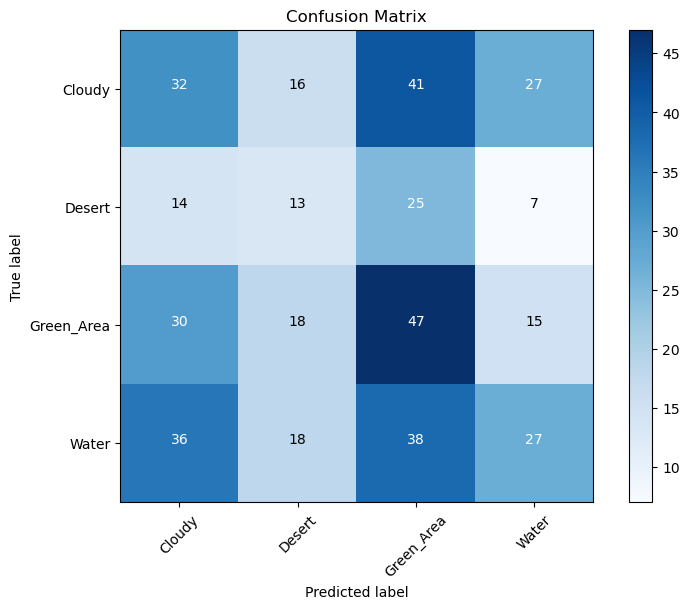

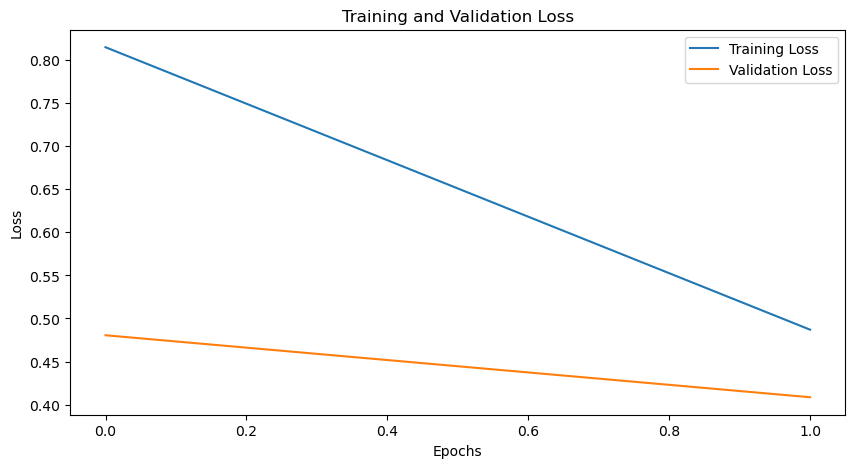

In [19]:
cm = confusion_matrix(actual_labels, predicted_labels)

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


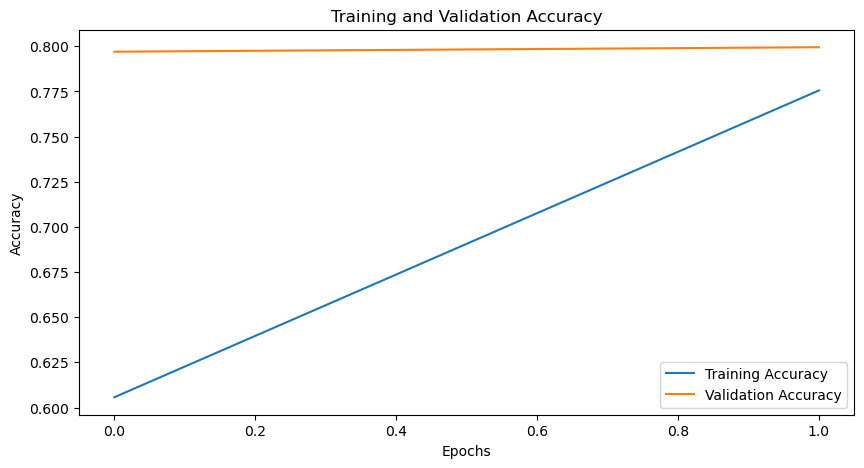

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
